# Týden 12. Matplotlib

## Instalace

Matplotlib lze nainstalovat pomocí pip nebo conda. 

### Pip

```
pip install matplotlib
```

### Conda

```
conda install -c conda-forge matplotlib
```

## Pyplot

`matplotlib.pyplot` je kolekce funkcí, díky kterým matplotlib pracuje jako MATLAB. Každá funkce pyplot provede nějakou změnu v obrázku: např. vytvoří obrázek, vytvoří v obrázku vykreslovací oblast, vykreslí do vykreslovací oblasti nějaké čáry, dodá obrázku popisky atd.

Nejdřív naimportujeme pyplot a numpy:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Nasledujícím příkazem v Jupyter Notebook zapnete řádkové vykreslování, při kterém se v poznámkovém bloku zobrazí grafické prvky. To má důležité důsledky pro interaktivitu. Při řádkovém vykreslování nebudou mít příkazy v buňkách pod buňkou, ze které se vykresluje graf, na tento graf vliv. Například změna barevné mapy není možná z buněk pod buňkou, která vytváří výkres.

In [37]:
%matplotlib inline

Nakreslíme jednoduchý graf kvadratické funkce:

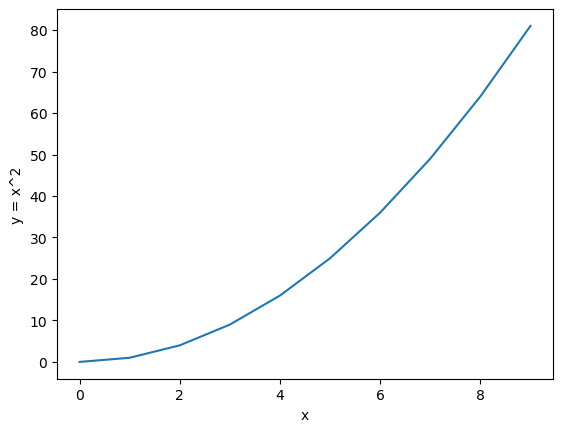

In [41]:
x = np.arange(10)
y = x ** 2
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y = x^2') # Try '$y = x^2$' for LaTeX formatting
plt.show() # Not necessary if %matplotlib inline is on

### Formátování stylu grafu
Pro každou dvojici argumentů x, y existuje nepovinný třetí argument, kterým je formátovací řetězec, který udává barvu a typ čáry grafu. Písmena a symboly formátovacího řetězce pocházejí z MATLABu a řetězec barvy se spojuje s řetězcem stylu čáry. Výchozí formátovací řetězec je `"b-"`, což je plná modrá čára. Chcete-li například vykreslit výše uvedený graf s červenými kruhy, zadejte příkaz:

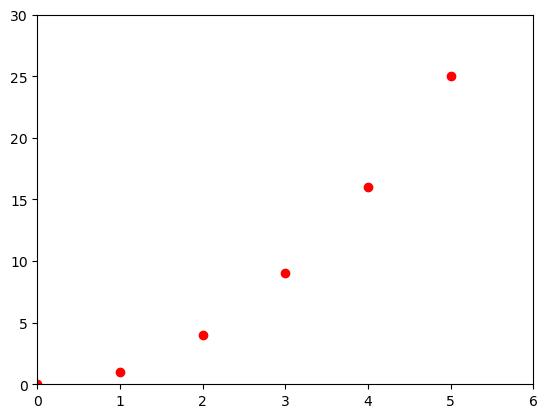

In [8]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 30])
plt.show()

Funkce `axis` ve výše uvedeném příkladu přebírá seznam `[xmin, xmax, ymin, ymax]` a určuje pohled na osy. Příklad formátovacích řetězců:

- `'b'` - modré značky s výchozím tvarem
- `'or'` - červené kruhy
- `'-g'` - zelená plná čára
- `'--'` - přerušovaná čára s výchozí barvou
- `'^k:'`  - černé trojúhelníkové značky spojené přerušovanou čarou

Úplný seznam stylů řádků a formátovacích řetězců naleznete v [dokumentaci](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).

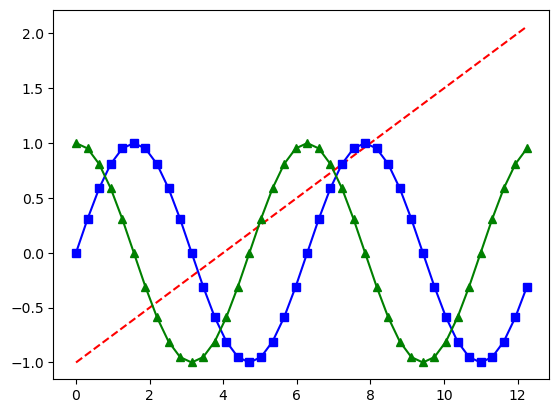

In [15]:
t = np.arange(0., 4*np.pi, 0.1*np.pi)

# red dashes, blue squares and green triangles
plt.plot(t, -1 + 0.25*t, 'r--', t, np.sin(t), '-bs', t, np.cos(t), '-g^')
plt.show()

### Vykreslování s kategoriálními proměnnými
Je také možné vytvořit graf pomocí kategoriálních proměnných. Matplotlib umožňuje předávat kategoriální proměnné přímo mnoha vykreslovacím funkcím. Například:

<BarContainer object of 3 artists>

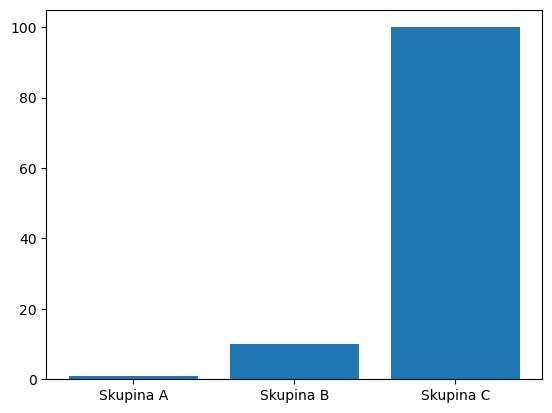

In [16]:
names = ['Skupina A', 'Skupina B', 'Skupina C']
values = [1, 10, 100]

plt.bar(names, values)

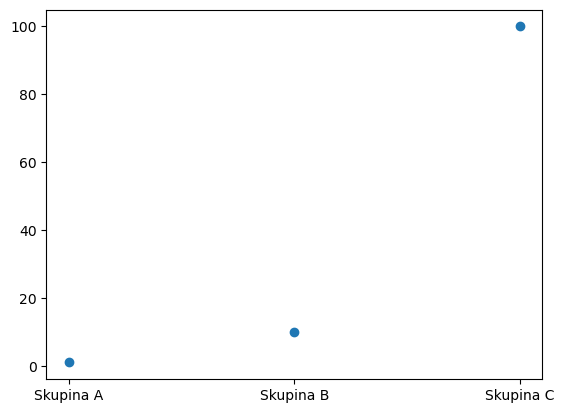

In [17]:
plt.scatter(names, values)

### Práce s více obrázky a osami
MATLAB a pyplot mají koncepci aktuálního obrázku a aktuálních os. Všechny funkce pro vykreslování se vztahují na aktuální osy. Funkce `gca` vrací aktuální osy (instance `matplotlib.axes.Axes`) a `gcf` vrací aktuální obrázek (`instance matplotlib.figure.Figure`). Obvýkle se tím nemusíte zabývat, protože o vše je postaráno v pozadí. Níže je uveden skript pro vytvoření dvou dílčích grafů.

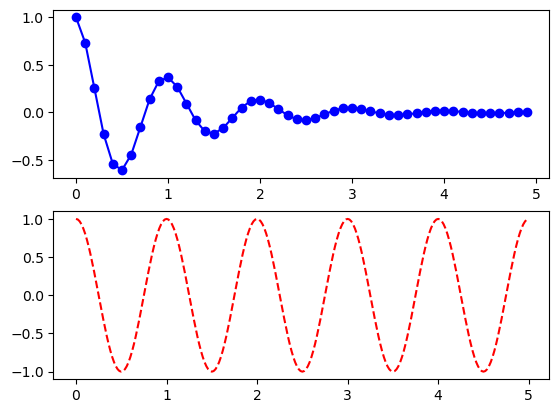

In [19]:
f = lambda t: np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t1, f(t1), '-bo')

plt.subplot(2, 1, 2)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

Volání `figure` je zde nepovinné, protože obrázek se vytvoří, pokud žádný neexistuje, stejně jako se vytvoří osy (ekvivalentní explicitnímu volání `subplot()`), pokud žádné neexistuji. Volání `subplot` určuje `numrows`, `numcols`, `plot_number`, kde `plot_number` se pohybuje od `1` do `numrows*numcols`. 

Pokud vytváříte velké množství obrázků, musíte si uvědomit ještě jednu věc: paměť potřebná pro obrázek se zcela uvolní až po explicitním uzavření obrázku pomocí příkazu `close`. Vymazání všech odkazů na obrázek a/nebo použití správce oken k ukončení okna, ve kterém se obrázek zobrazuje na obrazovce, nestačí, protože pyplot si zachovává vnitřní odkazy, dokud není zavoláno `close`.

In [20]:
plt.close()

## Práce s textem
Funkci `text` lze použít k přidání textu na libovolné místo a `xlabel`, `ylabel` a `title` slouží k přidání textu na určená místa.

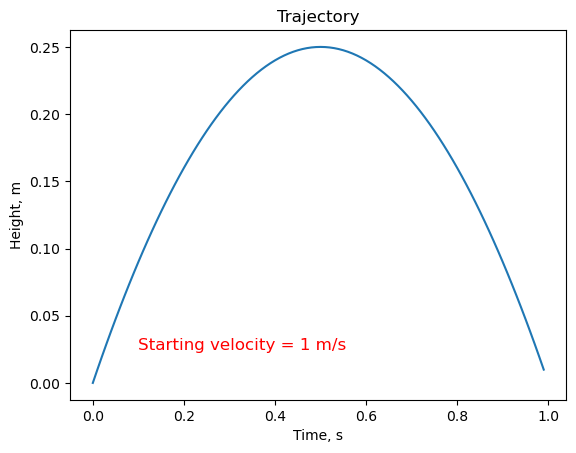

In [53]:
t = np.arange(0, 1, 0.01)

plt.plot(t, -t**2 + t)
plt.xlabel('Time, s')
plt.ylabel('Height, m')
plt.title('Trajectory')
plt.text(0.1, 0.025, r'Starting velocity = 1 m/s', fontsize=12, color='red')
plt.show()

### Logaritmické a jiné nelineární osy

Matplotlib.pyplot podporuje nejen lineární měřítka os, ale také logaritmická a logitová měřítka. To se běžně používá, pokud data pokrývají mnoho řádů. Změna měřítka osy je snadná:

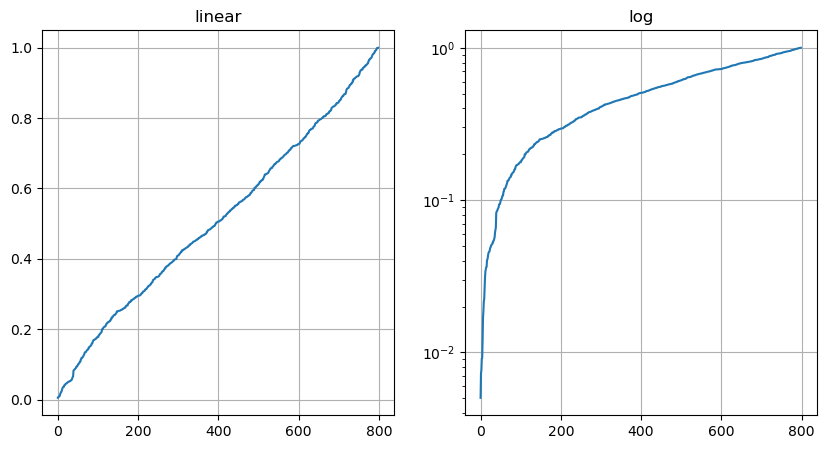

In [35]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(figsize=(10, 5))

# linear
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

plt.show()

## Různé typy grafů

### Histogram

Histogram je grafické znázornění rozložení souboru dat. Poskytuje vizuální shrnutí základního rozdělení četnosti nebo pravděpodobnosti dat.

V histogramu jsou data rozdělena do sady intervalů (bins) podél osy `x` a výška každého binu představuje četnost nebo počet datových bodů spadajících do tohoto binu. Osa `y` obvykle představuje hodnoty četnosti nebo počtu.

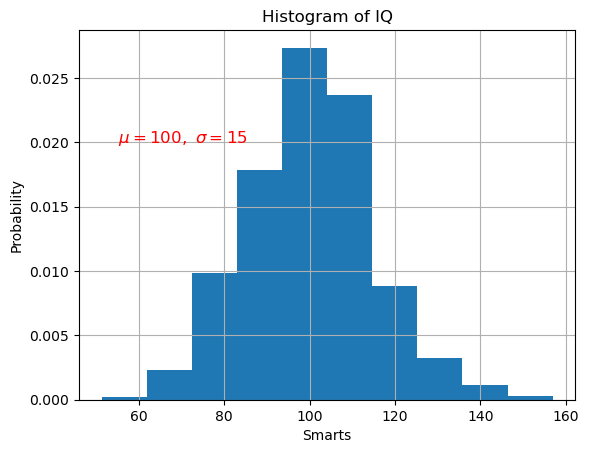

In [60]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(1000)

# the histogram of the data
n, bins, patches = plt.hist(x, 10, density=True)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(55, 0.02, r'$\mu=100,\ \sigma=15$', fontsize=12, color='red')
plt.grid(True)
plt.show()

Můžeme také získat objekty `n`, `bins` a `patches`.
- `n`: obsahuje četnost jednotlivých binů
- `bins`: představuje střední hodnotu každého binu
- `patches`: objekt Patch pro tvar obdélníku reprezentující každý sloupec.

In [61]:
print(n)
print(bins)
print(patches)

[0.0001893  0.00227162 0.00984368 0.017889   0.02735407 0.02366269
 0.00880252 0.00321813 0.00113581 0.00028395]
[ 51.2833698   61.84852435  72.4136789   82.97883345  93.543988
 104.10914255 114.6742971  125.23945165 135.8046062  146.36976075
 156.9349153 ]
<BarContainer object of 10 artists>


### Koláčový graf
Jedná se o kruhový graf, který je rozdělen na výseče pro znázornění číselného poměru. Řez koláčového grafu má znázornit podíl částí z celku.

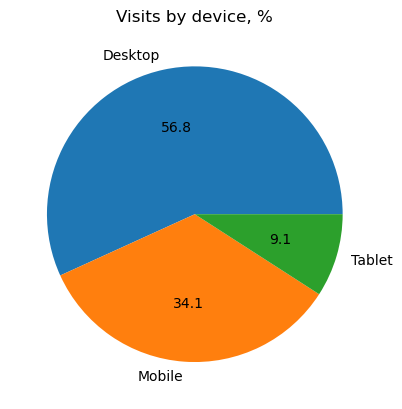

In [68]:
plt.pie([56.8, 34.1, 9.1], labels=['Desktop', 'Mobile', 'Tablet'], autopct='%.1f')
plt.title('Visits by device, %')
plt.show()

### Boxplot
Boxplot neboli krabicový graf je způsob grafické vizualizace numerických dat pomocí jejich kvartilů. Střední „krabicová“ část diagramu je shora ohraničena 3. kvartilem, zespodu 1. kvartilem a mezi nimi se nachází linie vymezující medián. Boxploty mohou obsahovat také linie vycházející ze střední části diagramu kolmo nahoru a dolů, tzv. vousy, vyjadřující variabilitu dat pod prvním a nad třetím kvartilem. Odlehlé hodnoty, tzv. outliery, pak mohou být vykresleny jako jednotlivé body.

Text(0.5, 1.0, 'Basic boxplot')

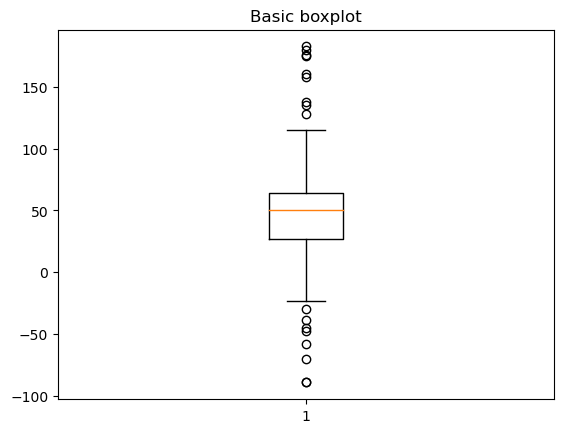

In [70]:
# Create some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

plt.boxplot(data)
plt.title('Basic boxplot')

### Sloupcový graf

Sloupcový graf nebo sloupcový diagram je diagram, který znázorňuje složení sledovaného souboru pomocí obdélníkových pruhů, jejichž délka proporcionálně odpovídá velikosti hodnot, které znázorňují. Pruhy mohou být nakresleny svisle i vodorovně.

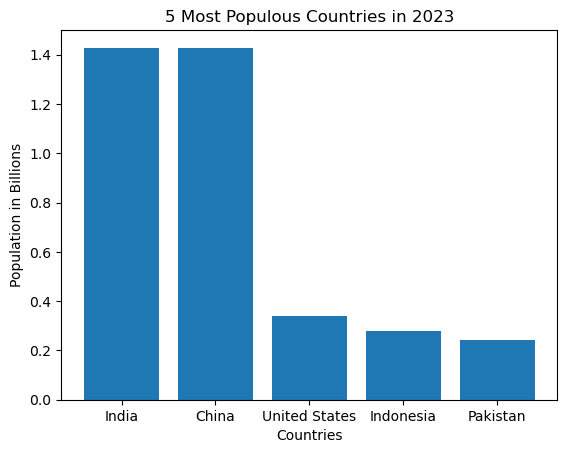

In [74]:
countries = ['India', 'China', 'United States', 'Indonesia', 'Pakistan']
population = np.array([1428627663, 1425671352, 339996563, 277534122, 240485658])

plt.bar(countries, population/1e9)
plt.xlabel('Countries')
plt.ylabel('Population in Billions')
plt.title('5 Most Populous Countries in 2023')
plt.show()

### Stackplot

Stohovací grafy vykreslují více datových sad jako vertikálně poskládané oblasti. To je užitečné, pokud jsou zajímavé jednotlivé hodnoty dat a navíc jejich kumulativní hodnota.

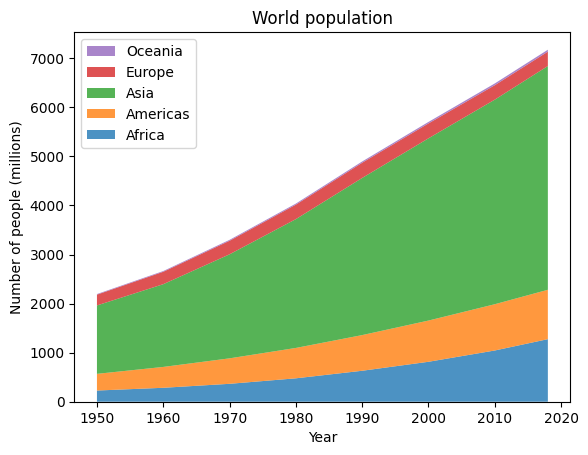

In [35]:
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
    'Africa': [228, 284, 365, 477, 631, 814, 1044, 1275],
    'Americas': [340, 425, 519, 619, 727, 840, 943, 1006],
    'Asia': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
    'Europe': [220, 253, 276, 295, 310, 303, 294, 293],
    'Oceania': [12, 15, 19, 22, 26, 31, 36, 39],
}

fig, ax = plt.subplots()
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
ax.legend(loc='upper left', reverse=True)
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()

### 3D povrchy

<Figure size 640x480 with 0 Axes>

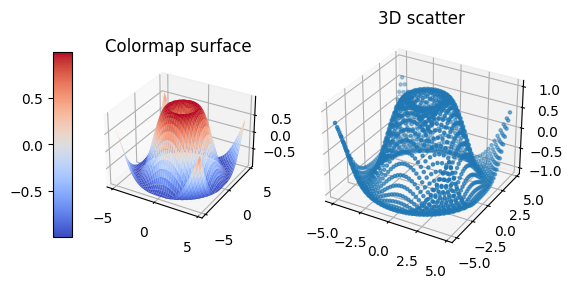

In [26]:
plt.figure()
fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf1 = ax[0].plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0, antialiased=True)
surf2 = ax[1].scatter(X, Y, Z, marker='.')

# Add titles
ax[0].set_title('Colormap surface')
ax[1].set_title('3D scatter')

# Add a color bar which maps values to colors.
fig.colorbar(surf1, shrink=0.5, aspect=10, location='left')

plt.show()

## Cvičení
Zkuste napodobít nasledující obrázky:

### Příklad 1.

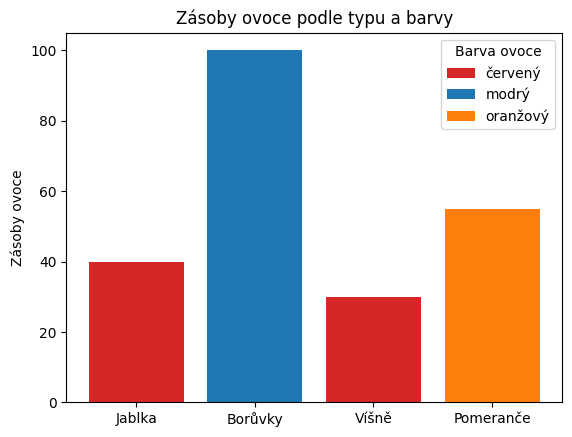

In [31]:
fruits = ['Jablka', 'Borůvky', 'Víšně', 'Pomeranče']
counts = [40, 100, 30, 55]

bar_labels = ['červený', 'modrý', '_červený', 'oranžový']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

### Řešení

In [ ]:
fig, ax = plt.subplots()

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Zásoby ovoce')
ax.set_title('Zásoby ovoce podle typu a barvy')
ax.legend(title='Barva ovoce')

plt.show()

### Příklad 2.

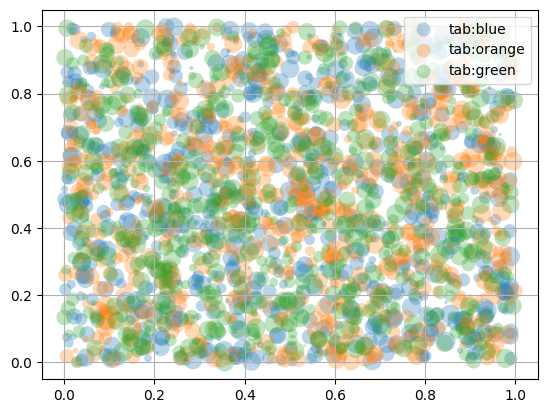

In [34]:
# data for each color
n_points = 750
x, y = np.random.rand(2, n_points)
scale = 200.0 * np.random.rand(n_points) # random marker size

### Řešení

In [ ]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n_points = 750
    x, y = np.random.rand(2, n_points)
    scale = 200.0 * np.random.rand(n_points)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()